# Two and More Qubits:

In [2]:
import numpy as np, matplotlib.pyplot as plt
plt.style.use(['science', 'notebook', 'grid', 'dark_background'])

# OTHER QISKIT IMPORTS

from qiskit import *
from qiskit.visualization import *
from qiskit_ibm_runtime import *
from qiskit_aer import *

# DRAW STYLE (default mpl dark), check https://quantum.cloud.ibm.com/docs/en/guides/visualize-circuits and 
# https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.visualization.circuit_drawer for more styles

def draw_circuit(qc):
    return qc.draw(output = 'mpl', style = 'iqp-dark')

Last time, we saw how to create and manipulate a single qubit using Qiskit. It's now imperative to understand how the quantum gates work on multiple qubits, in an extended Hilbert space. You might've seen those complex quantum circuits involving multiple qubits, and we'll slowly build up to those *Quantum Algorithms.* Firstly, some physics to understand how to 'extend' our qubit space:

John von Neumann's formulation of quantum mechanics, the quantum states of a system (or independent qubits) are represented by vectors in a complex Hilbert space, whose dimension is the product of the dimensions of the individual systems. You might be thinking, "What if we combine the members of the computational basis to form a new computational basis for a $2^2$-dimensional Hilbert space?" Yes, that's exactly what we do!

This operation is notably **billinear and associative** (but not unitary, so be careful!). The operation is called the *Kronecker Product* (or Tensor Product). In mathematics, it's defined for two vector spaces (and applicably, two bases) $V$ and $W$ over the same field $F$ as the vector space $V \otimes W$, with a bilinear map $V \times W \to V \otimes W$. Hilbert spaces in the context of quantum mechanics are vector spaces over the field of complex numbers $\mathbb{C}$, so they can be combined using the Kronecker product, as $\mathcal{H}_C=\mathcal{H}_A \otimes \mathcal{H}_B$.

For the computational basis states $\{\ket{0}, \ket{1}\}$, we can form a new 2-qubit basis consisting of $2^2=4$ states, as follows:

$$\ket{00} = \ket{0} \otimes \ket{0} = \begin{pmatrix}1 \\ 0\end{pmatrix} \otimes \begin{pmatrix}1 \\ 0\end{pmatrix} = \begin{pmatrix}1 \\ 0 \\ 0 \\ 0\end{pmatrix}$$

Kronecker products can be computed by hand by following the rule:

$$A \otimes B = \begin{pmatrix}a_{11}B & a_{12}B \\ a_{21}B & a_{22}B\end{pmatrix}$$

Or, we could use NumPy's `kron` function to compute it for us! Before testing, try to compute the other three basis states by hand by following the rule above. Let's see how this works in practice with Qiskit:

In [4]:
ket0 = np.array([[1], [0]])  # |0>
ket1 = np.array([[0], [1]])  # |1>

ket00 = np.kron(ket0, ket0) 
ket01 = np.kron(ket0, ket1)  
ket10 = np.kron(ket1, ket0)  
ket11 = np.kron(ket1, ket1)  

print("|00>:\n", ket00, "\n\n|01>:\n", ket01, "\n\n|10>:\n", ket10, "\n\n|11>:\n", ket11)

|00>:
 [[1]
 [0]
 [0]
 [0]] 

|01>:
 [[0]
 [1]
 [0]
 [0]] 

|10>:
 [[0]
 [0]
 [1]
 [0]] 

|11>:
 [[0]
 [0]
 [0]
 [1]]


Such a set of qubits is called a **quantum register** in Qiskit. Let's create a 2-qubit quantum register and observe the Bloch surface:

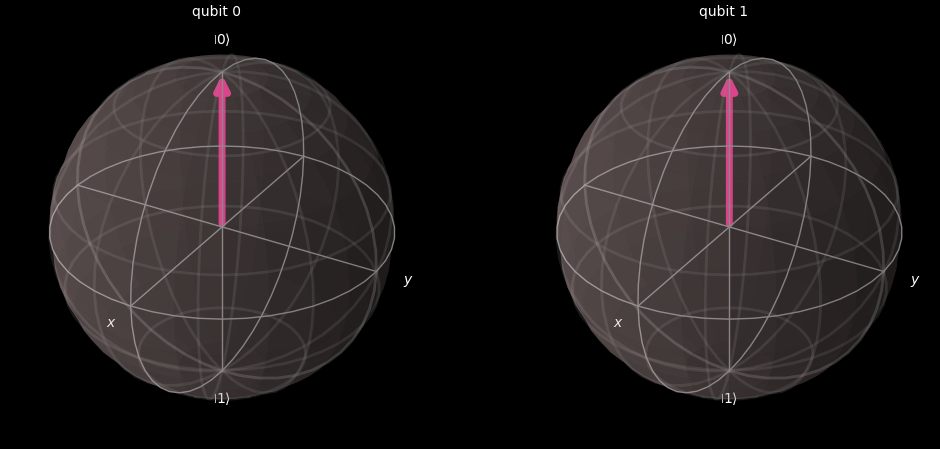

In [6]:
qc = QuantumCircuit(2)
plot_bloch_multivector(qc)

Straightforward enough, right? Try with 3 qubits and different initial states next! You'll catch on that the Bloch sphere is not the best way to visualize multiple qubits, but it's a start. You also might've had the intuition that the dimension of the Bloch 'sphere' increases with the number of qubits, and that's correct! The dimension of the Hilbert space for $n$ qubits is $2^n$, so the Bloch sphere is a $2^n-1$ dimensional hypersphere, **although** it's separable into $n$ individual Bloch spheres for each qubit, as shown above.

For $n$ qubits, the computational basis states can be represented as $\{\ket{00\ldots0}, \ket{00\ldots1}, \ket{00\ldots10}, \ldots, \ket{11\ldots1}\}$, where each state is formed by the Kronecker product of the individual qubit states. For example, for 3 qubits, the basis states are: $\{\ket{000}, \ket{001}, \ket{010}, \ket{011}, \ket{100}, \ket{101}, \ket{110}, \ket{111}\}$.

Try a circuit with multiple qubits and apply some gates to see how they interact!

In [ ]:
qc = QuantumCircuit()

# Create your circuit here, using gates we have learned so far 

draw_circuit(qc)

Now that we have a basic understanding of multiple qubits and how to represent them, we can start exploring multi-qubit gates and their effects on quantum states. Most gates in quantum computing are either in their original form, single- or two-qubit gates.

However, we can extend single-qubit gates to multi-qubit systems by applying the Kronecker product with identity matrices for the unaffected qubits. For example, the *two-qubit Hadamard gate* is obtained simply by applying the Kronecker product of two Hadarmards:

$$H \otimes H = \dfrac{1}{\sqrt{2}}\begin{pmatrix}1 & 1 \\ 1 & -1\end{pmatrix} \otimes \begin{pmatrix}1 & 1 \\ 1 & -1\end{pmatrix} = \dfrac{1}{2}\begin{pmatrix}1 & 1 & 1 & 1 \\ 1 & -1 & 1 & -1 \\ 1 & 1 & -1 & -1 \\ 1 & -1 & -1 & 1\end{pmatrix}$$

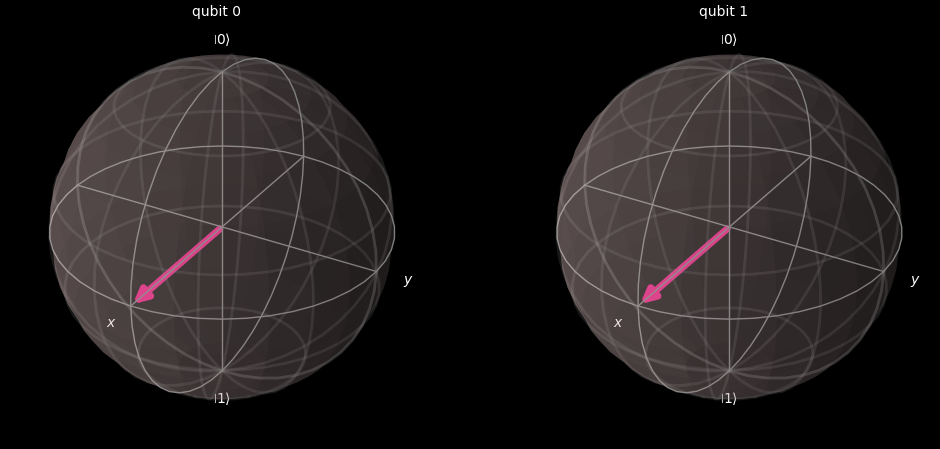

In [10]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)

plot_bloch_multivector(qc)

The *Multi-Qubit Hadamard Gate* can be implemented in Qiskit by applying the Hadamard gate to each qubit individually, and is actually widely used to create superposition states across multiple qubits in quantum algorithms we'll discuss:

$$H^{\otimes n}=\dfrac{1}{\sqrt{2^n}}\begin{pmatrix}1 & 1 & \cdots & 1 \\ 1 & -1 & \cdots & 1 \\ \vdots & \vdots & \ddots & \vdots \\ 1 & 1 & \cdots & -1\end{pmatrix}$$

# Quantum Entanglement:

Before we look at some two-qubit gates, it's important to understand the concept of *Quantum Entanglement*. Entanglement is a unique (non)local quantum phenomenon where the states of two or more qubits become correlated in such a way that the state of one qubit **cannot be described independently** of the state of the other qubit(s), even when they are separated by large distances.

The simplest system that demonstrates entanglement is a two-qubit system part of the *Bell Basis,* described by Alexander Bell in 1964. The Bell states are four specific maximally entangled quantum states of two qubits, given by:

$$\begin{align*}
\ket{\Phi^\pm} &= \frac{1}{\sqrt{2}} (|00\rangle \pm |11\rangle) \\
\ket{\Psi^\pm} &= \frac{1}{\sqrt{2}} (|01\rangle \pm |10\rangle) \\
\end{align*}$$

These states are **maximally entangled,** meaning that measuring one qubit immediately determines the state of the other qubit, no matter the distance between them. If you notice, they're part of the 16-set of equal superpositions of the computational basis states. If a measurement is made, entanglement can be observed, as either product state is equally probable, and there's no way to tell if the first qubit is in the state $\ket{0}$ or $\ket{1}$ without measuring the second qubit.

Is there a measure for 'how entangled' a quantum state is? Yes! One common measure is the *Entanglement Entropy*, which quantifies the degree of entanglement between subsystems of a quantum system. For a bipartite system described by a density matrix $\rho$, the entanglement entropy $S$ is given by the von Neumann entropy of the reduced density matrix $\rho_A$ (or $\rho_B$):

$$S = -\text{Tr}(\rho_A \log \rho_A)$$

where $\rho_A = \text{Tr}_B(\rho)$ is the reduced density matrix obtained by tracing out subsystem B. For maximally entangled states like the Bell states, the entanglement entropy reaches its maximum value, indicating a high degree of entanglement between the qubits. We won't be using this measure in our examples, but it's good to know it exists!

For our purposes, it's enough to know a common trick to identify the 'degree of entanglement' in a two-qubit system. If the state of the two-qubit system can be expressed as a product of the states of the individual qubits, i.e., $\ket{\psi} = \ket{\phi_1} \otimes \ket{\phi_2}$, then the qubits are **not entangled**. However, if the state cannot be factored in this way, the qubits are entangled. For example, the Bell state $\ket{\Phi^+} = \frac{1}{\sqrt{2}} (\ket{00} + \ket{11})$ cannot be expressed as a product of individual qubit states $\ket{00}$ and $\ket{11}$, indicating that the qubits are entangled.

Additionally, if $\{\alpha, \beta, \gamma, \delta\}$ are the amplitudes of the two-qubit state $\ket{\psi} = \alpha\ket{00} + \beta\ket{01} + \gamma\ket{10} + \delta\ket{11}$, then the qubits are entangled if and only if the condition $\alpha\delta \neq \beta\gamma$ holds true. If $\alpha\delta = \beta\gamma$, the state can be factored into a product of individual qubit states, indicating that the qubits are not entangled.

# The CNOT/CX Gate:

You might be thinking, if we can't generate entanglement with single-qubit gates, how do we do it? The answer lies in two-qubit gates, the most important of which is the **Controlled-NOT (CNOT or CX) Gate**. The CNOT gate is a fundamental two-qubit gate that flips the state of the target qubit **if and only if** the control qubit is in the state $\ket{1}$. Its matrix representation in the computational basis $\{\ket{00}, \ket{01}, \ket{10}, \ket{11}\}$ is given by 

$$\text{CNOT} = \begin{pmatrix}1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0\end{pmatrix}$$

and the mapping is 

- $\ket{00}\to\ket{00}$
- $\ket{01}\to\ket{01}$
- $\ket{10}\to\ket{11}$
- $\ket{11}\to\ket{10}$

Now, I want you to think slowly, carefully about how this gate can generate, say $\ket{\Phi^+}$, given one of the computational basis states. Try to figure it out before looking at the code below! And remember, $\ket{00}$ is just two qubits in $\ket{0}$ each.

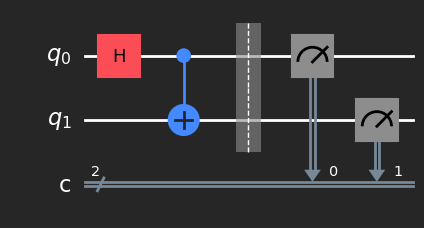

In [ ]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)

qc.barrier()
qc.measure([0, 1], [0, 1])

draw_circuit(qc)

The gate has a **dot on the control qubit** and a **cross on the target qubit,** connected by a vertical line. In Qiskit, you can implement the CNOT gate using the `cx` method of the `QuantumCircuit` class.

As you probably figured out, there's no point in looking at the bloch spheres here, since the qubits will be entangled after the operation. However, reverse the order of the gates, (try by hand as well) and see what happens!

Testing if the only measurement outcomes are 00 and 11 with equal probability (on real hardware, cause why not?): 

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(channel = 'ibm_cloud', token = '<Your API Token>')

backend = service.least_busy(simulator = False, operational = True)
backend.name, backend.num_qubits

qiskit_runtime_service._resolve_cloud_instances:WARNING:2025-11-06 00:52:50,735: Default instance not set. Searching all available instances.


('ibm_fez', 156)

In [28]:
pm = generate_preset_pass_manager(backend = backend, optimization_level = 3)
isa = pm.run(qc)


✅ Job finished in 0.4 s | Final status: DONE
Counts:  {'11': 3842, '00': 4203, '01': 71, '10': 76}


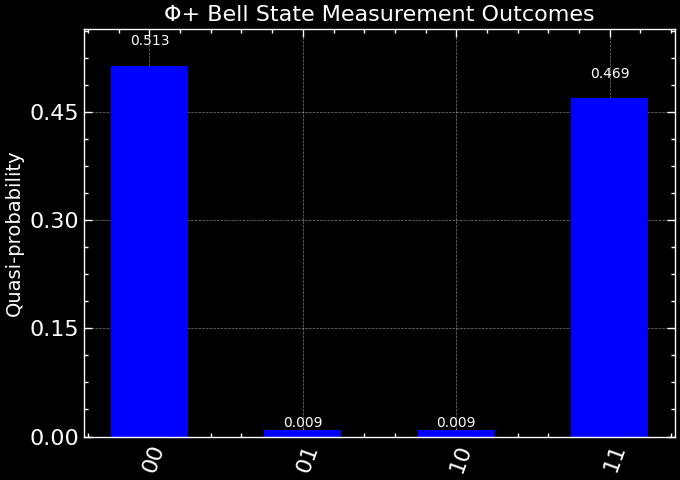

In [29]:
sampler = Sampler(mode = backend)

job = sampler.run([isa], shots = 8192)
result = job.result()

import time
start_time = time.time()

while not job.in_final_state():
    
    status = job.status()
    elapsed = time.time() - start_time
    
    print(f"Status: {status} | Elapsed: {elapsed:.1f} s", end="\r")
    time.sleep(2)   

result = job.result()
elapsed_total = time.time() - start_time

print(f"\n✅ Job finished in {elapsed_total:.1f} s | Final status: {job.status()}")
counts = result[0].data.c.get_counts()
print('Counts: ', counts)

plot_distribution(counts, color = 'blue', title = 'Φ+ Bell State Measurement Outcomes')

Did you try your 'order-reversed' circuit? What were the results?

In some circuits, you might've seen a 'reversed' CNOT gate, where the roles of the control and target qubits are swapped. This gate is usually referred to unofficially as just the **Reversed CNOT Gate**. The matrix representation of this gate in the computational basis $\{\ket{00}, \ket{01}, \ket{10}, \ket{11}\}$ is given by

$$\text{Reversed CNOT} = \begin{pmatrix}1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0\end{pmatrix}$$

Like how CNOT can generate entanglement, it can also **destroy** it! Try it out yourself by reversing the order of the gates in the previous circuit! You should get back the original state $\ket{00}$ with certainty.

Entanglement, as mentioned before, isn't limited to just two qubits. Multi-qubit entanglement can be achieved using combinations of two-qubit gates like CNOT along with single-qubit gates. For example, the *GHZ (Greenberger-Horne-Zeilinger) state* is a maximally entangled tripartite state given by

$$\ket{GHZ} = \frac{1}{\sqrt{2}} (\ket{000} + \ket{111})$$

Try generating this state using a combination of Hadamard and CNOT gates in Qiskit!

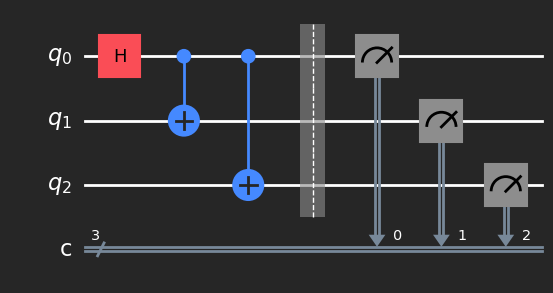

In [34]:
qc = QuantumCircuit(3, 3)

# Your code here

qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)

qc.barrier()
qc.measure([0, 1, 2], [0, 1, 2])

draw_circuit(qc)

In [ ]:
pm = generate_preset_pass_manager(backend = backend, optimization_level = 3)
isa = pm.run(qc)


✅ Job finished in 0.4 s | Final status: DONE
Counts:  {'111': 3761, '000': 4139, '101': 94, '100': 23, '110': 37, '011': 79, '010': 54, '001': 5}


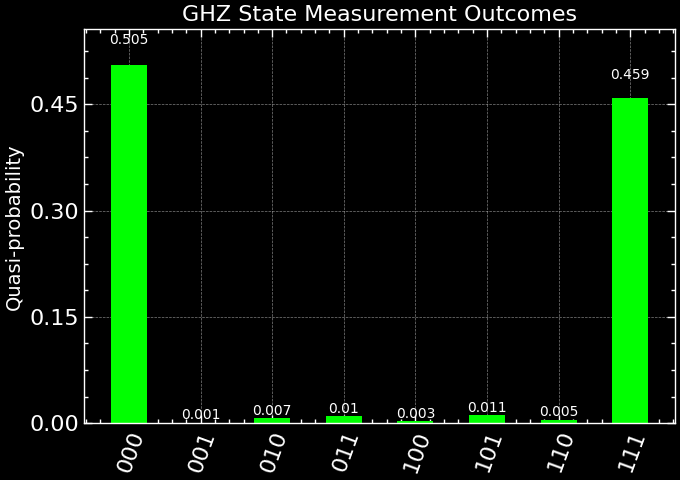

In [39]:
sampler = Sampler(mode = backend)

job = sampler.run([isa], shots = 8192)
result = job.result()

import time
start_time = time.time()

while not job.in_final_state():
    
    status = job.status()
    elapsed = time.time() - start_time
    
    print(f"Status: {status} | Elapsed: {elapsed:.1f} s", end="\r")
    time.sleep(2) 

result = job.result()
elapsed_total = time.time() - start_time

print(f"\n✅ Job finished in {elapsed_total:.1f} s | Final status: {job.status()}")
counts = result[0].data.c.get_counts()
print('Counts: ', counts)

plot_distribution(counts, color = 'lime', title = 'GHZ State Measurement Outcomes')

The *W State,* named after the physicist Eugene Wigner, is another interesting multi-qubit entangled state for three qubits, defined as 

$$\ket{W} = \frac{1}{\sqrt{3}} (\ket{001} + \ket{010} + \ket{100})$$

Qiskit implementation is quite involved, so try to follow along with me!

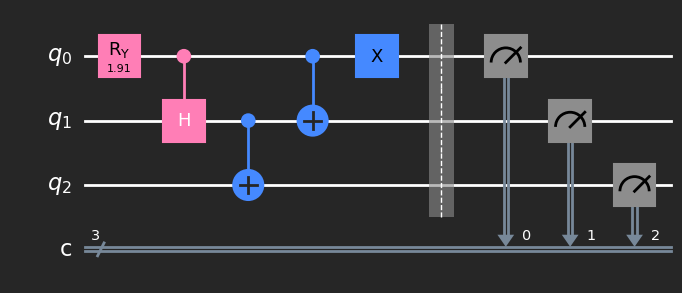

In [43]:
qc = QuantumCircuit(3, 3)

qc.ry(2 * np.arccos(np.sqrt(1/3)), 0)
qc.ch(0, 1)
qc.cx(1, 2)
qc.cx(0, 1)
qc.x(0)

qc.barrier()
qc.measure([0, 1, 2], [0, 1, 2])

draw_circuit(qc)

We use a (kinda)-new gate here, the 'CH' or **Controlled-Hadamard Gate**, which applies a Hadamard gate to the target qubit if the control qubit is in the state $\ket{1}$. Its matrix representation in the computational basis $\{\ket{00}, \ket{01}, \ket{10}, \ket{11}\}$ is given by

$$\text{CH} = \dfrac{1}{\sqrt 2}\begin{pmatrix}\sqrt{2} & 0 & 0 & 0 \\ 0 & \sqrt{2} & 0 & 0 \\ 0 & 0 & 1 & 1 \\ 0 & 0 & 1 & -1\end{pmatrix}$$

Like this one, there also exist other controlled gates, such as the rest of the controlled Pauli Gates (CY, CZ) and the Controlled-Phase Gate (CP). Any *Controlled-U (CU) Gate* can be constructed by applying the unitary operation $U$ to the target qubit when the control qubit is in the state $\ket{1}$. The mapping, given 

$$\begin{align*}CU = \begin{pmatrix}I & 0 \\ 0 & U\end{pmatrix}&&U = \begin{pmatrix}u_{00} & u_{01} \\ u_{10} & u_{11}\end{pmatrix}\end{align*}$$


where $I$ is the identity matrix acting on the control qubit's subspace, and $U$ is the unitary operation applied to the target qubit's subspace, is

- $\ket{0}\ket{\psi} \to \ket{0}\ket{\psi}$
- $\ket{1}\ket{\psi} \to \ket{1}U\ket{\psi}$

where $\ket{\psi}$ is the state of the target qubit.

Finally, let's test if we got the W state right by measuring the qubits:

In [44]:
pm = generate_preset_pass_manager(backend = backend, optimization_level = 3)
isa = pm.run(qc)


✅ Job finished in 0.4 s | Final status: DONE
Counts:  {'010': 2606, '001': 2607, '100': 2715, '000': 125, '111': 36, '101': 21, '011': 27, '110': 55}


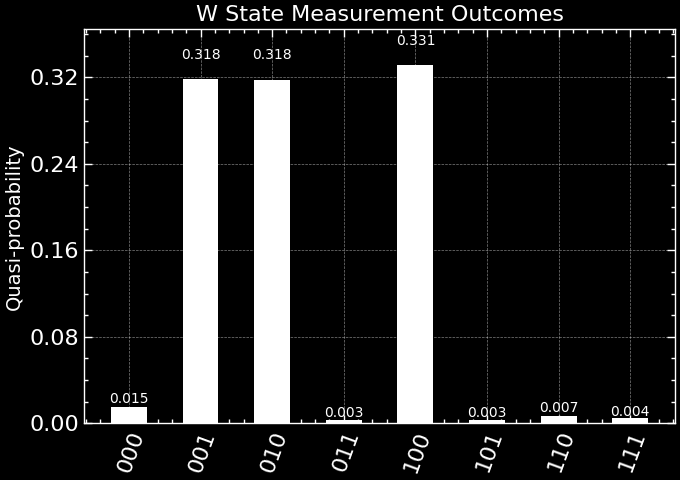

In [45]:
sampler = Sampler(mode = backend)

job = sampler.run([isa], shots = 8192)
result = job.result()

import time
start_time = time.time()

while not job.in_final_state():
    
    status = job.status()
    elapsed = time.time() - start_time
    
    print(f"Status: {status} | Elapsed: {elapsed:.1f} s", end="\r")
    time.sleep(2) 

result = job.result()
elapsed_total = time.time() - start_time

print(f"\n✅ Job finished in {elapsed_total:.1f} s | Final status: {job.status()}")
counts = result[0].data.c.get_counts()
print('Counts: ', counts)

plot_distribution(counts, color = 'white', title = 'W State Measurement Outcomes')

Nice!

# Tangent - Multi-Qubit Hadamard Gate and Toffoli Gate:

Let's take a look at the generalized Hadamard gate for multiple qubits, and see how it can be used to create superposition states across multiple qubits in quantum algorithms we'll discuss later on!

The *Multi-Qubit Hadamard Gate* can be implemented in Qiskit by applying the Hadamard gate to each qubit individually, and is actually a Discrete Fourier Transform in disguise!

$$H^{\otimes n}=\dfrac{1}{\sqrt{2^n}}\begin{pmatrix}1 & 1 & \cdots & 1 \\ 1 & -1 & \cdots & 1 \\ \vdots & \vdots & \ddots & \vdots \\ 1 & 1 & \cdots & -1\end{pmatrix}$$

Specifically, the *Walsh-Hadamard Transform* is the application of the multi-qubit Hadamard gate to an $n$-qubit system initialized in the state $\ket{0}^{\otimes n}$, resulting in an equal superposition of all possible computational basis states. It's equivalent to the multidimensional Discrete Fourier Transform over the group $\mathbb{Z}_{2^n}$ of size $2^n$.

For $n$ qubits, superposition is prepared from the initial state $\ket{0}^{\otimes n}$ as 

$$H^{\otimes n} \ket{0}^{\otimes n} = \dfrac{1}{\sqrt{2^n}} \sum\limits_{j=0}^{2^n-1} \ket{j}$$

Entanglement beyond 2 qubits could be automated using algorithms, but that's a topic for another day. For now, let's briefly discuss the *Toffoli Gate* (or CCNOT gate), which is a three-qubit gate that flips the state of the target qubit if and only if both control qubits are in the state $\ket{1}$. Its matrix representation in the three-qubit computational basis $\{\ket{000}, \ket{001}, \ket{010}, \ket{011}, \ket{100}, \ket{101}, \ket{110}, \ket{111}\}$ is given by

$$\text{Toffoli} = \begin{pmatrix}1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\end{pmatrix}$$

In case you're wondering, there is upto an $n$-qubit Toffoli gate, which flips the state of the target qubit if and only if **all** control qubits are in the state $\ket{1}$. 

# The SWAP Gate:

Our final gate is pretty simple, it simply swaps the states of two qubits. Its matrix representation in the computational basis $\{\ket{00}, \ket{01}, \ket{10}, \ket{11}\}$ is given as

$$\text{SWAP} = \begin{pmatrix}1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1\end{pmatrix}$$

and its mapping is

- $\ket{00}\to\ket{00}$
- $\ket{01}\to\ket{10}$
- $\ket{10}\to\ket{01}$
- $\ket{11}\to\ket{11}$

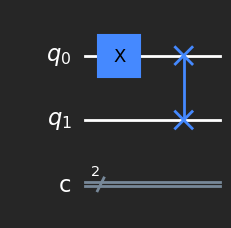

In [48]:
qc = QuantumCircuit(2, 2)

qc.x(0)
qc.swap(0, 1)

draw_circuit(qc)

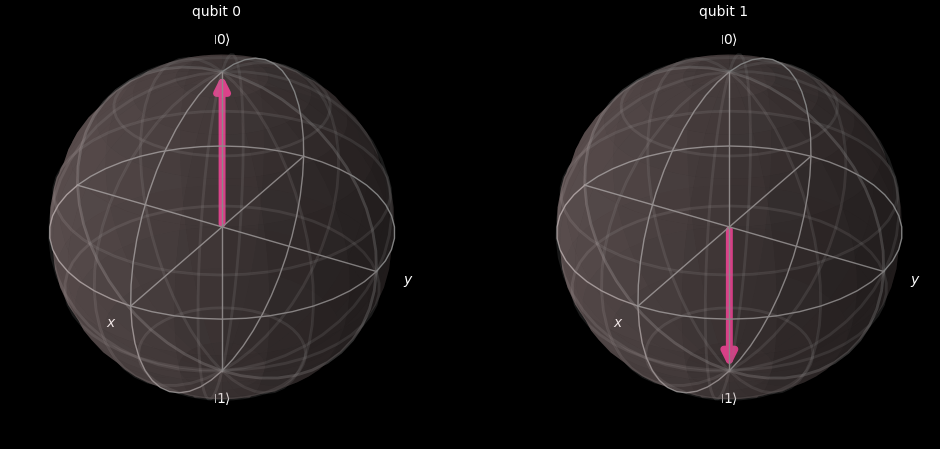

In [49]:
plot_bloch_multivector(qc)

Of course, SWAP's effect of swapping the states from $\ket{01}$ to $\ket{10}$ and vice versa can be very useful in quantum circuits, especially when qubits need to interact but are not directly connected in the hardware architecture. By swapping the states of qubits, we can bring them into proximity for operations like CNOT or other two-qubit gates.

It's not particularly exciting, but it's definitely useful!

This is pretty much all you need to know about multi-qubit gates for now. In the next section, we'll tackle some quantum algorithms that utilize these gates to perform computations beyond classical capabilities.

# ----------------------------------------- *** ------------------------------------------